In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit

In [8]:
DUNEblue = '#7FAED5'
DUNElightOrange = '#F19E54'
DUNEdarkOrange = '#F0652B'
DUNEgreen = '#8ACA6F'
DUNEgray = '#626466'
DUNEyellow = '#FBD03F'
DUNEpurple = '#5B3069'
DUNElightPurple = '#8C6E96'
DUNEcyan = '#42C2A8'
DUNEpink = '#F7AEC2'

DUNEcolors = [DUNEblue,
              DUNElightOrange,
              DUNEdarkOrange,
              DUNEgreen,
              DUNEgray,
              DUNEyellow,
              DUNEpurple,
              DUNElightPurple,
              DUNEcyan,
              DUNEpink]

matplotlib.rc('font', family = 'FreeSerif', size = 16, weight = 'bold')
matplotlib.rc('text', usetex = True)
matplotlib.rc('axes', prop_cycle = matplotlib.cycler(color = DUNEcolors))
matplotlib.rc('figure', figsize = (10.0, 8.0))

def quadr_sum(*args):
    return np.sqrt(sum(np.power(args, 2)))

Text(0, 0.5, 'Current [mA]')

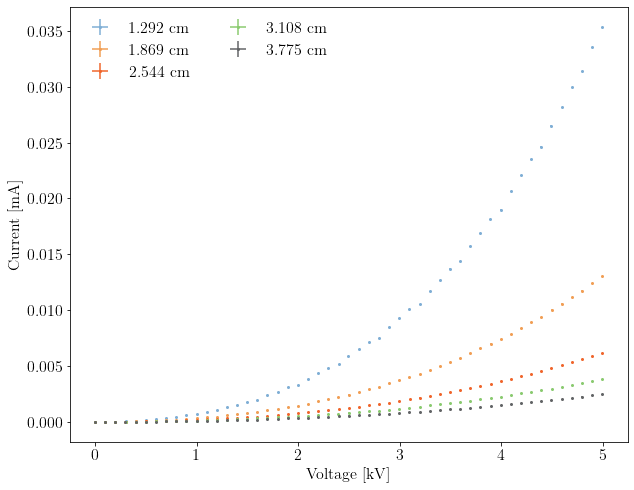

In [9]:
### MSU TLM Plot 1: voltage vs. current

data = [{"file": "MSU_TLM_data/sample2.dat",
         "label": r'1.292 cm'},
        {"file": "MSU_TLM_data/sample4.dat",
         "label": r'1.869 cm'},
        {"file": "MSU_TLM_data/sample1.dat",
         "label": r'2.544 cm'},
        {"file": "MSU_TLM_data/sample5.dat",
         "label": r'3.108 cm'},
        {"file": "MSU_TLM_data/sample3.dat",
         "label": r'3.775 cm'},]

fig = plt.figure()
ax = fig.gca()

for item in data:
    V, dV, I, dI = np.loadtxt(item["file"], 
                              delimiter = ',', 
                              skiprows = 1).T
    
    V /= 1000 # voltage in kV
    dV /= 1000
    
    I /= 1000 # current in mA
    dI /= 1000
    
    ax.errorbar(V, I,
                xerr = dV,
                yerr = dI,
                ls = "none",
                fmt = 'o',
                ms = 2,
                label = item["label"])
    
ax.legend(ncol = 2, frameon = False)
ax.set_xlabel(r'Voltage [kV]')
ax.set_ylabel(r'Current [mA]')

1.292 cm [0.63414065 3.74621531 1.46975437] [[ 6.97110410e-06 -3.24998657e-05  2.67282609e-06]
 [-3.24998657e-05  1.52600390e-04 -1.23215935e-05]
 [ 2.67282609e-06 -1.23215935e-05  1.04428750e-06]]
1.869 cm [1.01045307 3.50187967 1.49316268] [[ 1.39845836e-05 -3.63243023e-05  3.99583316e-06]
 [-3.63243023e-05  9.50173971e-05 -1.02658476e-05]
 [ 3.99583316e-06 -1.02658476e-05  1.16236658e-06]]
2.544 cm [1.39494533 3.39743904 1.50352234] [[ 3.05592872e-05 -5.46653325e-05  6.87829541e-06]
 [-5.46653325e-05  9.82746179e-05 -1.22039627e-05]
 [ 6.87829541e-06 -1.22039627e-05  1.56986792e-06]]
3.108 cm [1.72040254 3.42004408 1.51463473] [[ 7.22411918e-05 -1.02156040e-04  1.40083481e-05]
 [-1.02156040e-04  1.44957319e-04 -1.96978279e-05]
 [ 1.40083481e-05 -1.96978279e-05  2.74227671e-06]]
3.775 cm [2.63322066 2.84447088 1.60762245] [[ 2.15179025e-04 -1.73547892e-04  2.99399962e-05]
 [-1.73547892e-04  1.40572699e-04 -2.39714741e-05]
 [ 2.99399962e-05 -2.39714741e-05  4.21923239e-06]]


<ipython-input-8-7caa397db2b3>:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.sqrt(sum(np.power(args, 2)))
<ipython-input-8-7caa397db2b3>:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.sqrt(sum(np.power(args, 2)))
<ipython-input-8-7caa397db2b3>:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.sqrt(s

[]

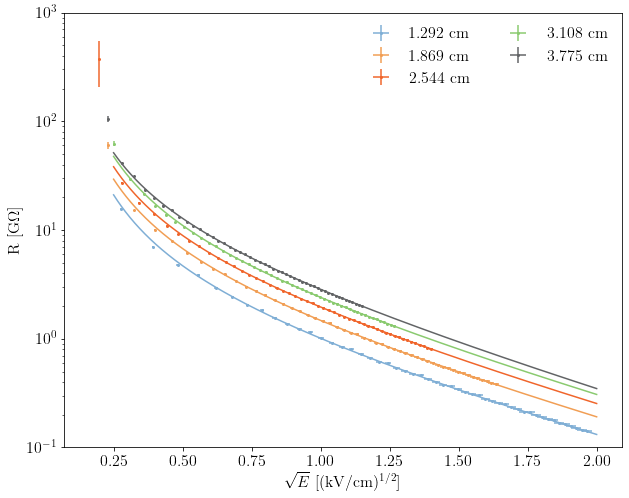

In [16]:
### MSU TLM Plot 2: sqrt(E) vs. resistance

def R_model(E, R0, E0, a):
    return R0*np.exp(np.sqrt(E0/E) - a*E)

starting_values = (1, 1, 1)
optBounds = ([1e-5, 1e-1, 1e-3],[1e1, 50, 1e3])

#def R_model(E, R0, E0, a):
#    return R0*np.exp(np.power(E0/E, a))

#starting_values = (0.01, 20, 0.5)
#optBounds = ([1e-5, 1e-1, 1e-1],[1e1, 50, 1e0])

#def R_model(E, R0, E0):
#    return R0*np.exp(-np.sqrt(E/E0))

#starting_values = (1, 1e-2)
#optBounds = ([1e-5, 1e-3],[1e4, 5e-1])

#def R_model(E, R0, E0):
#    return R0*np.exp(np.sqrt(E0/E))

#starting_values = (1, 1)
#optBounds = ([1e-5, 1e-1],[1e1, 5e2])


data = [{"file": "MSU_TLM_data/sample2.dat",
         "length": 1.292,
         "label": r'1.292 cm',
         "color": DUNEblue},
        {"file": "MSU_TLM_data/sample4.dat",
         "length": 1.869,
         "label": r'1.869 cm',
         "color": DUNElightOrange},
        {"file": "MSU_TLM_data/sample1.dat",
         "length": 2.544,
         "label": r'2.544 cm',
         "color": DUNEdarkOrange},
        {"file": "MSU_TLM_data/sample5.dat",
         "length": 3.108,
         "label": r'3.108 cm',
         "color": DUNEgreen},
        {"file": "MSU_TLM_data/sample3.dat",
         "length": 3.775,
         "label": r'3.775 cm',
         "color": DUNEgray},]

dL = 0.025

fig = plt.figure()
ax = fig.gca()

for item in data:
    V, dV, I, dI = np.loadtxt(item["file"], 
                              delimiter = ',', 
                              skiprows = 2).T
    
    V /= 1000 # voltage in kV
    dV /= 1000
    
    I /= 1000 # current in mA
    dI /= 1000
    
    L = item["length"]
    
    E = V/item["length"]
    dE = E*quadr_sum(dV/V, dL/L)
    
    sqrtE = np.sqrt(E)
    dSqrtE = sqrtE*quadr_sum(0.5*dV/V, 0.5*dL/L)
    
    R = V/I # resistance in MOhm
    dR = R*quadr_sum(dV/V, dI/I)
    
    R *= 1.e-3 # resistance in GOhm
    dR *= 1.e-3
    
    ax.errorbar(sqrtE, R,
                xerr = dSqrtE,
                yerr = dR,
                ls = "none",
                fmt = 'o',
                ms = 2,
                label = item["label"],
                color = item["color"])
    
    #print (starting_values)
    #print (R_model(sqrtE, *starting_values))
    popt, pcov = curve_fit(R_model, 
                           sqrtE[1:], R[1:], 
                           sigma= dR[1:],
                           absolute_sigma = True,
                           p0 = starting_values,
                           bounds = optBounds)
    
    #print (item["label"])
    #print (popt, pcov)
    if np.any(pcov[np.isfinite(pcov)]):
        print(item["label"], popt, pcov)
        fineSqrtE = np.linspace(0.25, 2, 1000)
        plt.plot(fineSqrtE, 
                 R_model(fineSqrtE, *popt),
                 color = item["color"])
        item["popt"] = popt
        item["pcov"] = pcov
    
ax.legend(ncol = 2, frameon = False)
ax.set_xlabel(r'$\sqrt{E}$ [(kV/cm)$^{1/2}$]')
ax.set_ylabel(r'R [G$\Omega$]')

#plt.plot(fineSqrtE, R_model(fineSqrtE, *starting_values))

ax.set_ylim(1e-1 ,1e3)

plt.semilogy() 

1.292 cm [1.37722538e+02 4.15390065e-02] [[ 8.07861695e-03 -7.93258254e-07]
 [-7.93258254e-07  7.86104594e-11]]
1.869 cm [1.96008457e+02 4.19335814e-02] [[ 1.28416207e-02 -9.73533939e-07]
 [-9.73533939e-07  7.43797080e-11]]
2.544 cm [2.57695858e+02 4.20794441e-02] [[ 1.85939242e-02 -1.14107451e-06]
 [-1.14107451e-06  7.04371368e-11]]
3.108 cm [3.27749570e+02 4.14617487e-02] [[ 3.21867696e-02 -1.56169532e-06]
 [-1.56169532e-06  7.61166695e-11]]
3.775 cm [4.04068058e+02 4.07537984e-02] [[ 7.98281688e-02 -3.24803515e-06]
 [-3.24803515e-06  1.32676789e-10]]


<ipython-input-8-7caa397db2b3>:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.sqrt(sum(np.power(args, 2)))
<ipython-input-8-7caa397db2b3>:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.sqrt(sum(np.power(args, 2)))
<ipython-input-8-7caa397db2b3>:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.sqrt(s

[]

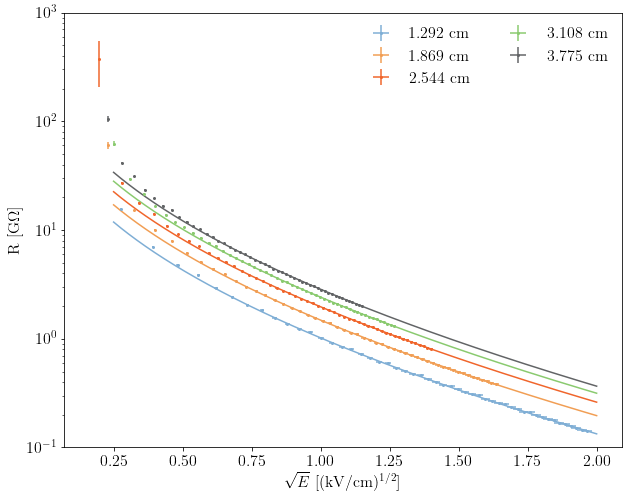

In [11]:
### MSU TLM Plot 2: sqrt(E) vs. resistance

#def R_model(E, R0, E0, a):
#    return R0*np.exp(np.sqrt(E0/E) - a*E)

#starting_values = (1, 1, 1)
#optBounds = ([1e-5, 1e-1, 1e-3],[1e1, 50, 1e3])

#def R_model(E, R0, E0, a):
#    return R0*np.exp(np.power(E0/E, a))

#starting_values = (0.01, 20, 0.5)
#optBounds = ([1e-5, 1e-1, 1e-1],[1e1, 50, 1e0])

def R_model(E, R0, E0):
    return R0*np.exp(-np.sqrt(E/E0))

starting_values = (1, 1e-2)
optBounds = ([1e-5, 1e-3],[1e4, 5e-1])

#def R_model(E, R0, E0):
#    return R0*np.exp(np.sqrt(E0/E))

#starting_values = (1, 1)
#optBounds = ([1e-5, 1e-1],[1e1, 5e2])


data = [{"file": "MSU_TLM_data/sample2.dat",
         "length": 1.292,
         "label": r'1.292 cm',
         "color": DUNEblue},
        {"file": "MSU_TLM_data/sample4.dat",
         "length": 1.869,
         "label": r'1.869 cm',
         "color": DUNElightOrange},
        {"file": "MSU_TLM_data/sample1.dat",
         "length": 2.544,
         "label": r'2.544 cm',
         "color": DUNEdarkOrange},
        {"file": "MSU_TLM_data/sample5.dat",
         "length": 3.108,
         "label": r'3.108 cm',
         "color": DUNEgreen},
        {"file": "MSU_TLM_data/sample3.dat",
         "length": 3.775,
         "label": r'3.775 cm',
         "color": DUNEgray},]

dL = 0.025

fig = plt.figure()
ax = fig.gca()

for item in data:
    V, dV, I, dI = np.loadtxt(item["file"], 
                              delimiter = ',', 
                              skiprows = 2).T
    
    V /= 1000 # voltage in kV
    dV /= 1000
    
    I /= 1000 # current in mA
    dI /= 1000
    
    L = item["length"]
    
    E = V/item["length"]
    dE = E*quadr_sum(dV/V, dL/L)
    
    sqrtE = np.sqrt(E)
    dSqrtE = sqrtE*quadr_sum(0.5*dV/V, 0.5*dL/L)
    
    R = V/I # resistance in MOhm
    dR = R*quadr_sum(dV/V, dI/I)
    
    R *= 1.e-3 # resistance in GOhm
    dR *= 1.e-3
    
    ax.errorbar(sqrtE, R,
                xerr = dSqrtE,
                yerr = dR,
                ls = "none",
                fmt = 'o',
                ms = 2,
                label = item["label"],
                color = item["color"])
    
    #print (starting_values)
    #print (R_model(sqrtE, *starting_values))
    popt, pcov = curve_fit(R_model, 
                           sqrtE[1:], R[1:], 
                           sigma= dR[1:],
                           absolute_sigma = True,
                           p0 = starting_values,
                           bounds = optBounds)
    
    #print (item["label"])
    #print (popt, pcov)
    if np.any(pcov[np.isfinite(pcov)]):
        print(item["label"], popt, pcov)
        fineSqrtE = np.linspace(0.25, 2, 1000)
        plt.plot(fineSqrtE, 
                 R_model(fineSqrtE, *popt),
                 color = item["color"])
        item["popt"] = popt
        item["pcov"] = pcov
    
ax.legend(ncol = 2, frameon = False)
ax.set_xlabel(r'$\sqrt{E}$ [(kV/cm)$^{1/2}$]')
ax.set_ylabel(r'R [G$\Omega$]')

#plt.plot(fineSqrtE, R_model(fineSqrtE, *starting_values))

ax.set_ylim(1e-1 ,1e3)

plt.semilogy()  

[1.6323628  0.17102372] [[ 0.00093969 -0.00236576]
 [-0.00236576  0.00668019]]


Text(0, 0.5, 'Sample Resistance [G$\\Omega$]')

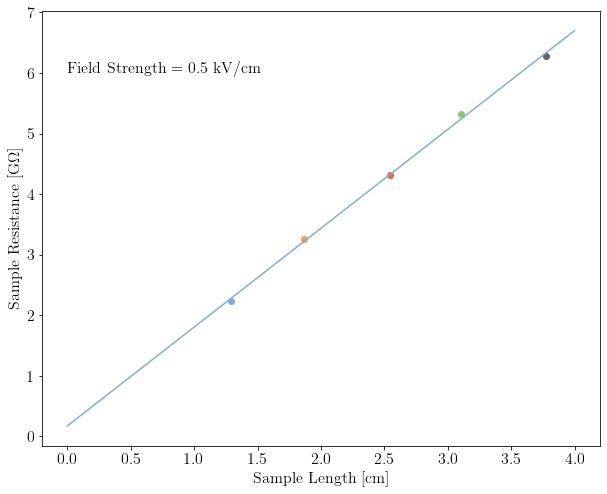

In [17]:
def TLM_model(L, m, b):
    return m*L + b

starting_values = (4, 0)
optBounds = ([0, -10], [20, 10])

testField = np.sqrt(0.5)

lengths = []
Rs = []

for item in data:
    L = item["length"]
    R = R_model(testField, *item["popt"])
    plt.scatter(L, R, color = item["color"])
    lengths.append(L)
    Rs.append(R)

popt, pcov = curve_fit(TLM_model, 
                       lengths, Rs,
                       p0 = starting_values,
                       bounds = optBounds)
print (popt, pcov)

fineLspace = np.linspace(0, 4, 1000)
plt.plot(fineLspace, TLM_model(fineLspace, *popt))

plt.text(0, 6, 'Field Strength = '+str(round(testField**2, 2))+' kV/cm')
plt.xlabel(r'Sample Length [cm]')
plt.ylabel(r'Sample Resistance [G$\Omega$]')

Text(0, 0.5, '$R_C$ [G$\\Omega$]')

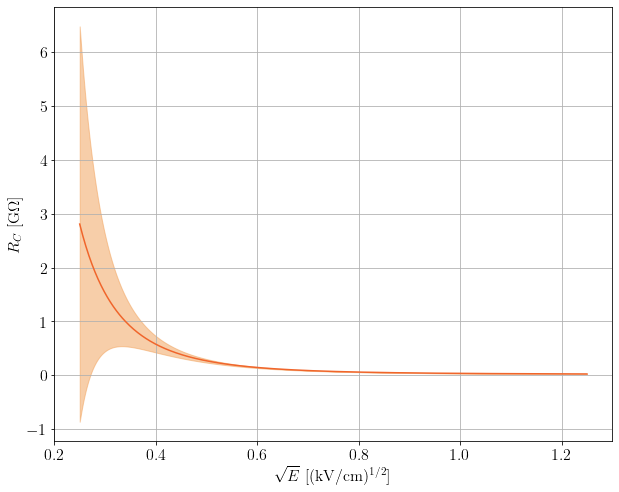

In [19]:
testFields = np.linspace(0.25, 1.25, 500)
Rcs = []
dRcs = []

for testField in testFields:
    lengths = []
    Rs = []

    for item in data:
        L = item["length"]
        R = R_model(testField, *item["popt"])
        lengths.append(L)
        Rs.append(R)

    popt, pcov = curve_fit(TLM_model, 
                           lengths, Rs,
                           p0 = starting_values,
                           bounds = optBounds)
    Rcs.append(0.5*popt[1])
    dRcs.append(0.5*pcov[1][1])
    
lower_bound = [R - dR for R, dR in zip(Rcs, dRcs)]
upper_bound = [R + dR for R, dR in zip(Rcs, dRcs)]
    
plt.plot(testFields, Rcs, color = DUNEdarkOrange)
plt.fill_between(testFields, lower_bound, upper_bound, alpha = 0.5, color = DUNElightOrange)

#plt.semilogy()
plt.grid()

plt.xlabel(r'$\sqrt{E}$ [(kV/cm)$^{1/2}$]')
plt.ylabel(r'$R_C$ [G$\Omega$]')